<a href="https://colab.research.google.com/github/chocozzang/My_Python_Practice/blob/main/%EC%9E%91%EC%97%85_2%EC%9C%A0%ED%98%95_%EC%97%B0%EA%B4%80%EA%B7%9C%EC%B9%99%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/store_data.csv', encoding='utf-8', header = None)
data = data[data.columns[0:9]]
data.head()

,0,1,2,3,4,5,6,7,8
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN


In [21]:
transactions = []
for i in range(data.shape[0]):
  transactions.append([str(data[j][i]) for j in range(data.shape[1] - data.isnull().sum(axis=1)[i])])
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spaghetti',
  'mineral water',
  'black tea',
  'salmon',
  'eggs',
  'chicken'],
 ['meatballs', 'milk', 'honey', 'french fries', 'protein bar'],
 ['red wine', 'shrimp', 'pasta', 'pep

In [22]:
!pip install apyori
from apyori import apriori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
rules = apriori(transactions, min_support = 0.015, min_confidence = 0.2, min_lift = 1, min_length = 1)

In [24]:
result = list(rules)
result

[RelationRecord(items=frozenset({'mineral water'}), support=0.23810158645513932, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'mineral water'}), confidence=0.23810158645513932, lift=1.0)]),
 RelationRecord(items=frozenset({'burgers', 'eggs'}), support=0.027463004932675644, ordered_statistics=[OrderedStatistic(items_base=frozenset({'burgers'}), items_add=frozenset({'eggs'}), confidence=0.3149847094801223, lift=1.7778030893983428)]),
 RelationRecord(items=frozenset({'french fries', 'burgers'}), support=0.01946407145713905, ordered_statistics=[OrderedStatistic(items_base=frozenset({'burgers'}), items_add=frozenset({'french fries'}), confidence=0.22324159021406725, lift=1.3580982710427563)]),
 RelationRecord(items=frozenset({'milk', 'burgers'}), support=0.01786428476203173, ordered_statistics=[OrderedStatistic(items_base=frozenset({'burgers'}), items_add=frozenset({'milk'}), confidence=0.20489296636085627, lift=1.5844351965698793)]),
 RelationRecord(ite

In [25]:
print(len(result))

65


In [26]:
df = pd.DataFrame(result)
df

,items,support,ordered_statistics
0,(mineral water),0.238102,"[((), (mineral water), 0.23810158645513932, 1.0)]"
1,"(burgers, eggs)",0.027463,"[((burgers), (eggs), 0.3149847094801223, 1.777..."
2,"(french fries, burgers)",0.019464,"[((burgers), (french fries), 0.223241590214067..."
3,"(milk, burgers)",0.017864,"[((burgers), (milk), 0.20489296636085627, 1.58..."
4,"(burgers, mineral water)",0.024397,"[((burgers), (mineral water), 0.27981651376146..."
...,...,...,...
60,"(shrimp, spaghetti)",0.021197,"[((shrimp), (spaghetti), 0.2966417910447761, 1..."
61,"(tomatoes, spaghetti)",0.020931,"[((tomatoes), (spaghetti), 0.3060428849902534,..."
62,"(spaghetti, turkey)",0.016531,"[((turkey), (spaghetti), 0.26439232409381663, ..."
63,"(ground beef, spaghetti, mineral water)",0.017064,"[((ground beef, mineral water), (spaghetti), 0..."


In [27]:
df.to_csv('apriori_result.csv')
print(df.iloc[6:19][['items', 'support']])

                             items   support
6                     (cake, eggs)  0.017598
7             (cake, french fries)  0.015731
8            (cake, mineral water)  0.025463
9                (cake, spaghetti)  0.016531
10        (chicken, mineral water)  0.021597
11            (chicken, spaghetti)  0.015865
12           (chocolate, escalope)  0.015998
13  (frozen vegetables, chocolate)  0.021597
14        (ground beef, chocolate)  0.021730
15               (milk, chocolate)  0.030129
16      (chocolate, mineral water)  0.051193
17          (olive oil, chocolate)  0.015465
18             (shrimp, chocolate)  0.017064


In [32]:
ar = (df.iloc[1:63]['items'])
ar

1              (burgers, eggs)
2      (french fries, burgers)
3              (milk, burgers)
4     (burgers, mineral water)
5         (spaghetti, burgers)
                ...           
58      (olive oil, spaghetti)
59       (pancakes, spaghetti)
60         (shrimp, spaghetti)
61       (tomatoes, spaghetti)
62         (spaghetti, turkey)
Name: items, Length: 62, dtype: object

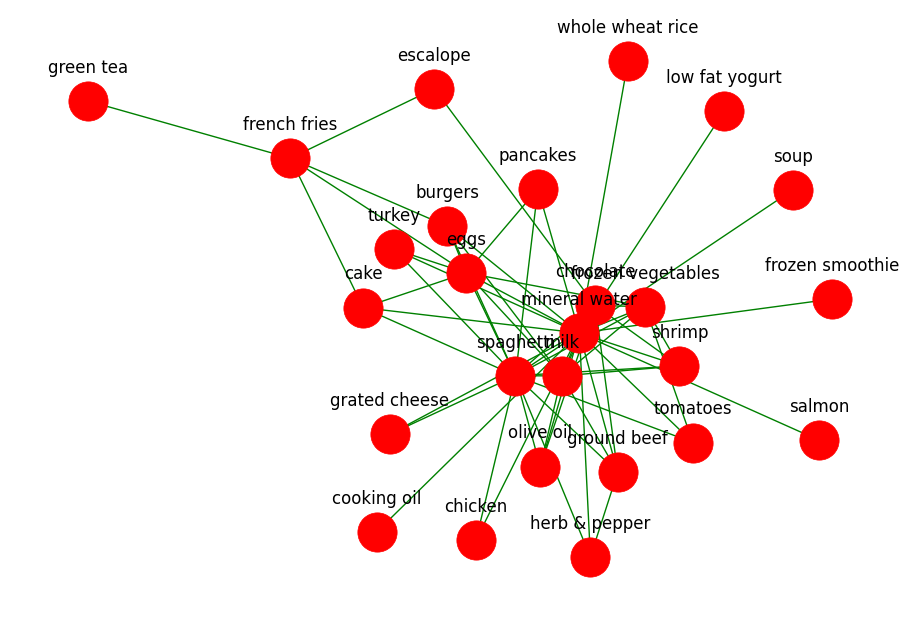

In [38]:
import networkx as nx
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize = (9,6))
G = nx.Graph()
G.add_edges_from(ar)
pos = nx.spring_layout(G)
nx.draw(G, pos, font_size = 16, with_labels = False, edge_color = 'green', node_size = 800, node_color = ['red'])

for p in pos:
  pos[p][1] += 0.07
nx.draw_networkx_labels(G, pos)
plt.show()